In [1]:
from utils import setrootdir
setrootdir("ppgcc-coautorias")

'Directory ppgcc-coautorias successfully loaded as current working directory.'

In [85]:
import os
import pickle
from pathlib import Path

from dotenv import load_dotenv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

sns.set_style("whitegrid")

# 3. Visualization

In [3]:
load_dotenv()

DATASET_DIRECTORY = os.getenv("DATASET_DIRECTORY")

In [4]:
preprocessing_directory = Path(DATASET_DIRECTORY, "02-preprocessing")

with open(Path(preprocessing_directory, "productions.pickle"), "rb") as f:
    df_productions = pickle.load(f)

df_productions

,production_id,name,citation,lattes_id,institution,production,authors,location,type,year,issn
0,0,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,Designing collaboration through a web-based gr...,"[Jose Maria Nazar David, Marcos Roberto da Sil...",International Journal of Computer Applications...,PERIODICO,2004,09528091
1,1,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,Supporting Awareness in Groupware through an A...,"[Rita Suzana Pitangueira Maciel, Jose Maria Na...",JOURNAL OF UNIVERSAL COMPUTER SCIENCE,PERIODICO,2009,0948695X
2,2,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,Management of Scientific Experiments in Comput...,"[Regina Maria Maciel Braga, Fernanda Cláudia A...",iSys - Revista Brasileira de Sistemas de Infor...,PERIODICO,2012,19842902
3,3,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,Scientific Provenance Metadata Capture and Man...,"[Wander Gaspar, Regina Maria Maciel Braga, Fer...","International Journal of Metadata, Semantics a...",PERIODICO,2015,17442621
4,4,Jose Maria Nazar David,"[Jose Maria Nazar David, DAVID, JOSÉ, DAVID, J...",3640497501056163,UFJF,PERSONNA: proposta de ontologia de contexto e ...,"[Paulo Rezende, Crystiam Kelle Pereira, Fernan...",Revista Brasileira de Informática na Educação,PERIODICO,2015,14145685
...,...,...,...,...,...,...,...,...,...,...,...
230912,230926,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, LEANDRO S. ARAÚJO...",6358983442870515,UFF,Pruning Weightless Neural Networks,"[Zachary Susskind, Igor Dantas Dos Santos Mira...",30th European Symposium on Artificial Neural N...,CONFERENCIA,2022,None
230913,230927,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, LEANDRO S. ARAÚJO...",6358983442870515,UFF,GSink - A Runtime for Gamma Programs and its C...,"[MELLO, RUI R., Gabriel Antoine Louis Paillard...",2023 IEEE International Parallel and Distribut...,CONFERENCIA,2023,None
230914,230928,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, LEANDRO S. ARAÚJO...",6358983442870515,UFF,Heuristics for t-admissibility with complex ne...,"[Carlos Thadeu Duarte Santos, Anderson Zudio, ...",SBPO 2023: Simpósio Brasileiro de Pesquisa Ope...,CONFERENCIA,2023,None
230915,230929,Leandro Santiago de Araujo,"[Leandro Santiago de Araujo, LEANDRO S. ARAÚJO...",6358983442870515,UFF,Gerando base de grafos não isomorfos com seus ...,"[Felipe Souza, Leandro Santiago de Araujo, Luí...",SBPO 2023: Simpósio Brasileiro de Pesquisa Ope...,CONFERENCIA,2023,None


In [5]:
visualization_directory = Path(DATASET_DIRECTORY, "04-visualization")
Path(visualization_directory).mkdir(parents=True, exist_ok=True)

## 3.1. PPGCC-UFPA data between 2014-20223

In [6]:
df_ufpa = df_productions[df_productions["institution"] == "UFPA"]
df_ufpa = df_ufpa[(df_ufpa["year"] >= 2014) & (df_ufpa["year"] <= 2023)]
df_ufpa

,production_id,name,citation,lattes_id,institution,production,authors,location,type,year,issn
123855,123858,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,A Method for Locating Multiple Intruders with ...,"[ARAÚJO, RAMON C.F., DE OLIVEIRA, RODRIGO M.S....",Applied Mathematical Modelling,PERIODICO,2015,0307904X
123856,123859,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,An Efficient Global Memory Addressing Techniqu...,"[Elisson E S Andrade, Rodrigo M. S. Oliveira, ...",INTERNATIONAL JOURNAL OF EMERGING TECHNOLOGY A...,PERIODICO,2017,22502459
123857,123860,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,Desafios do Uso da Tecnologia como Recurso Ped...,"[Maria José Menineá Duarte, João Batista Santi...",Brazilian Journal of Development,PERIODICO,2019,25258761
123858,123861,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,Game development as a pedagogical mechanism: a...,"[DAS MERCÊS SILVA, SARA, PANTOJA O. ARAUJO, FA...",RENOTE. REVISTA NOVAS TECNOLOGIAS NA EDUCAÇÃO,PERIODICO,2020,16791916
123859,123862,Josivaldo de Souza Araújo,"[Josivaldo de Souza Araújo, J. S. ARAÚJO, JOSI...",8158963767870649,UFPA,Um Mapeamento da Literatura sobre o Uso de Met...,"[Flávio Ramon Almeida de Souza, Marcos Rodrigo...",RENOTE. REVISTA NOVAS TECNOLOGIAS NA EDUCAÇÃO,PERIODICO,2023,16791916
...,...,...,...,...,...,...,...,...,...,...,...
127904,127907,Helder May Nunes da Silva Oliveira,"[Helder May Nunes da Silva Oliveira, OLIVEIRA,...",1468872219964148,UFPA,Resilient Routing for SDM-EON as a Crucial Ena...,"[Rafael da Silva Lopes, Helder May Nunes da Si...",SIMPÓSIO BRASILEIRO DE REDES DE COMPUTADORES E...,CONFERENCIA,2023,None
127905,127908,Helder May Nunes da Silva Oliveira,"[Helder May Nunes da Silva Oliveira, OLIVEIRA,...",1468872219964148,UFPA,"Backup, Routing, Modulation, Spectrum and Core...","[Helder May Nunes da Silva Oliveira, Nelson Lu...",2022 IEEE LatinAmerican Conference on Communic...,CONFERENCIA,2022,None
127906,127909,Helder May Nunes da Silva Oliveira,"[Helder May Nunes da Silva Oliveira, OLIVEIRA,...",1468872219964148,UFPA,Resilient Routing and Resource Allocation in S...,"[Helder May Nunes da Silva Oliveira, Nelson Lu...",2022 IEEE LatinAmerican Conference on Communic...,CONFERENCIA,2022,None
127907,127910,Helder May Nunes da Silva Oliveira,"[Helder May Nunes da Silva Oliveira, OLIVEIRA,...",1468872219964148,UFPA,Resilient Routing for SDM-EON as a Crucial Ena...,"[LOPES, RAFAEL S., Eduardo Coelho Cerqueira, D...",2022 IEEE Conference on Network Function Virtu...,CONFERENCIA,2022,None


## 3.2. Yearly publications

In [7]:
df_yearly = df_ufpa[["year", "type"]]
df_yearly = df_yearly[df_yearly["type"].isin(["CONFERENCIA", "PERIODICO"])]
df_yearly = df_yearly.groupby(["year", "type"]).size().reset_index(name='count')
df_yearly = df_yearly.pivot(index="year", columns="type", values="count")
df_yearly

type,CONFERENCIA,PERIODICO
year,,
2014,109,59
2015,96,59
2016,113,79
2017,98,56
2018,150,57
2019,205,73
2020,151,76
2021,136,104
2022,138,85


/tmp/ipykernel_231866/3915221362.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_yearly_pub.set_xticklabels(ax_yearly_pub.get_xticklabels(), rotation=0)


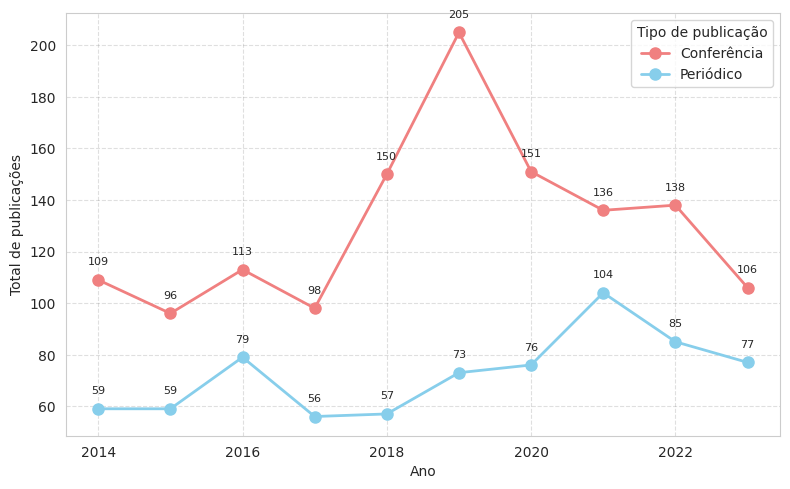

In [8]:
fig_yearly_pub, ax_yearly_pub = plt.subplots(figsize=(8, 5))
df_yearly.plot(kind="line", ax=ax_yearly_pub, color=["lightcoral", "skyblue"], marker='o', linewidth=2, markersize=8)

ax_yearly_pub.set_xlabel("Ano")
ax_yearly_pub.set_ylabel("Total de publicações")
ax_yearly_pub.legend(title="Tipo de publicação", labels=["Conferência", "Periódico"])

for line in ax_yearly_pub.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax_yearly_pub.text(x, y+5, f"{y}", fontsize=8, ha='center', va='bottom')

ax_yearly_pub.yaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_yearly_pub.xaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)

ax_yearly_pub.set_xticklabels(ax_yearly_pub.get_xticklabels(), rotation=0)

plt.tight_layout()

plt.savefig(Path(visualization_directory, "yearly_publications.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_publications.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_publications.pdf"), format='pdf', bbox_inches='tight')

plt.show()

## 3.3. Yearly coauthorship

In [9]:
df_yearly_coauthorship = df_ufpa[["name", "year", "authors", "type"]]
df_yearly_coauthorship["coauthors"] = df_yearly_coauthorship.apply(lambda row: [author for author in row["authors"] if author != row["name"]], axis=1)
df_yearly_coauthorship["n_coauthors"] = df_yearly_coauthorship["coauthors"].apply(len)
df_yearly_coauthorship = df_yearly_coauthorship[df_yearly_coauthorship["type"].isin(["CONFERENCIA", "PERIODICO"])]
df_yearly_coauthorship = df_yearly_coauthorship[["year", "type", "n_coauthors"]]
df_yearly_coauthorship = df_yearly_coauthorship.groupby(["year", "type"])["n_coauthors"].sum().reset_index()
df_yearly_coauthorship = df_yearly_coauthorship.pivot(index="year", columns="type", values="n_coauthors")
df_yearly_coauthorship

/tmp/ipykernel_231866/325004048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly_coauthorship["coauthors"] = df_yearly_coauthorship.apply(lambda row: [author for author in row["authors"] if author != row["name"]], axis=1)
/tmp/ipykernel_231866/325004048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly_coauthorship["n_coauthors"] = df_yearly_coauthorship["coauthors"].apply(len)


type,CONFERENCIA,PERIODICO
year,,
2014,407,410
2015,386,386
2016,445,472
2017,346,339
2018,580,317
2019,723,367
2020,565,415
2021,449,653
2022,426,472


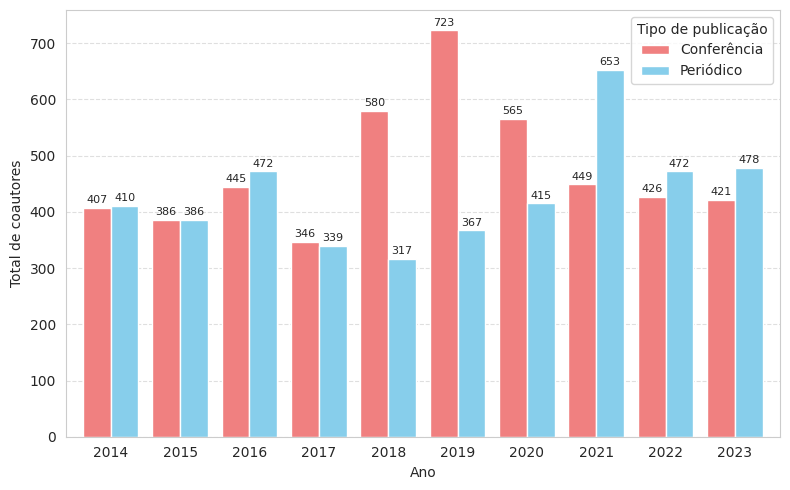

In [10]:
fig_yearly_coauth, ax_yearly_coauth = plt.subplots(figsize=(8, 5))

df_yearly_coauthorship.plot(
    kind="bar", 
    ax=ax_yearly_coauth, 
    color=["lightcoral", "skyblue"],
    width=0.8
)

ax_yearly_coauth.set_xlabel("Ano")
ax_yearly_coauth.set_ylabel("Total de coautores")
ax_yearly_coauth.legend(title="Tipo de publicação", labels=["Conferência", "Periódico"])

for container in ax_yearly_coauth.containers:
    ax_yearly_coauth.bar_label(container, fmt='%d', fontsize=8, padding=2)

ax_yearly_coauth.yaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_yearly_coauth.xaxis.grid(False)

ax_yearly_coauth.set_xticklabels(ax_yearly_coauth.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig(Path(visualization_directory, "yearly_coauthorship.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_coauthorship.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "yearly_coauthorship.pdf"), format='pdf', bbox_inches='tight')
plt.show()

## 3.4. Coauthorships by professor

In [20]:
df_coauth_professors = df_ufpa[["name", "authors"]]
df_coauth_professors["coauthors"] = df_coauth_professors.apply(lambda row: [author for author in row["authors"] if author != row["name"]], axis=1)
df_coauth_professors = df_coauth_professors[["name", "coauthors"]]
df_coauth_professors = df_coauth_professors.explode("coauthors")
df_coauth_professors = df_coauth_professors.drop_duplicates(subset=["name", "coauthors"])
df_coauth_professors = df_coauth_professors.groupby(by="name").size().reset_index(name="n_coauthorships")
df_coauth_professors = df_coauth_professors.sort_values(by="n_coauthorships", ascending=False)
df_coauth_professors

/tmp/ipykernel_231866/1004289072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coauth_professors["coauthors"] = df_coauth_professors.apply(lambda row: [author for author in row["authors"] if author != row["name"]], axis=1)


,name,n_coauthorships
24,Rommel Thiago Juca Ramos,744
17,Joao Crisóstomo Weyl Albuquerque Costa,353
14,Gustavo Pessin,343
25,Ronnie Cley de Oliveira Alves,292
9,Eduardo Coelho Cerqueira,292
8,Denis Lima do Rosário,241
26,Sandro Ronaldo Bezerra Oliveira,222
7,Cleidson Ronald Botelho de Souza,217
5,Carlos Renato Lisboa Francês,208
0,Aldebaro Barreto da Rocha Klautau Júnior,201


/tmp/ipykernel_231866/2732738370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_coauth_professors, x="n_coauthorships", y="name", ax=ax_coauth_prof, palette="viridis")


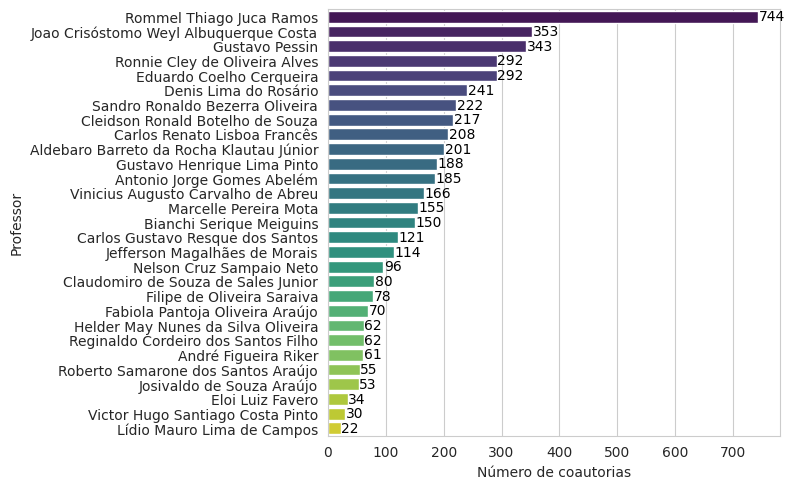

In [25]:
fig_coauth_prof, ax_coauth_prof = plt.subplots(figsize=(8, 5))

sns.barplot(data=df_coauth_professors, x="n_coauthorships", y="name", ax=ax_coauth_prof, palette="viridis")

for index, value in enumerate(df_coauth_professors["n_coauthorships"]):
    ax_coauth_prof.text(value + 1, index, str(value), color='black', va='center')

ax_coauth_prof.set_xlabel("Número de coautorias")
ax_coauth_prof.set_ylabel("Professor")

plt.tight_layout()

plt.savefig(Path(visualization_directory, "coauthorships_per_professor.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "coauthorships_per_professor.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "coauthorships_per_professor.pdf"), format='pdf', bbox_inches='tight')

plt.show()

## 3.5. Publications by professor

In [34]:
df_pub_by_prof = df_ufpa[["name", "type"]]
df_pub_by_prof = df_pub_by_prof[df_pub_by_prof["type"].isin(["CONFERENCIA", "PERIODICO"])]
df_pub_by_prof = df_pub_by_prof.groupby(["name", "type"]).size().reset_index(name="count")
df_pub_by_prof = df_pub_by_prof.pivot(index="name", columns="type", values="count").fillna(0)
df_pub_by_prof["total"] = df_pub_by_prof.sum(axis=1)
df_pub_by_prof = df_pub_by_prof.sort_values(by=["total", "PERIODICO", "CONFERENCIA"], ascending=False).reset_index()
df_pub_by_prof

type,name,CONFERENCIA,PERIODICO,total
0,Sandro Ronaldo Bezerra Oliveira,209,25,234
1,Eduardo Coelho Cerqueira,111,68,179
2,Joao Crisóstomo Weyl Albuquerque Costa,93,76,169
3,Denis Lima do Rosário,97,50,147
4,Gustavo Pessin,72,53,125
5,Rommel Thiago Juca Ramos,1,114,115
6,Aldebaro Barreto da Rocha Klautau Júnior,65,32,97
7,Carlos Renato Lisboa Francês,34,53,87
8,Gustavo Henrique Lima Pinto,61,26,87
9,Cleidson Ronald Botelho de Souza,65,20,85


In [35]:
df_pub_by_prof.to_csv(Path(visualization_directory, "publications_per_professor.csv"), index=False)

/tmp/ipykernel_231866/3299073678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pub_by_prof, x="total", y="name", ax=ax_pub_prof, palette="viridis")


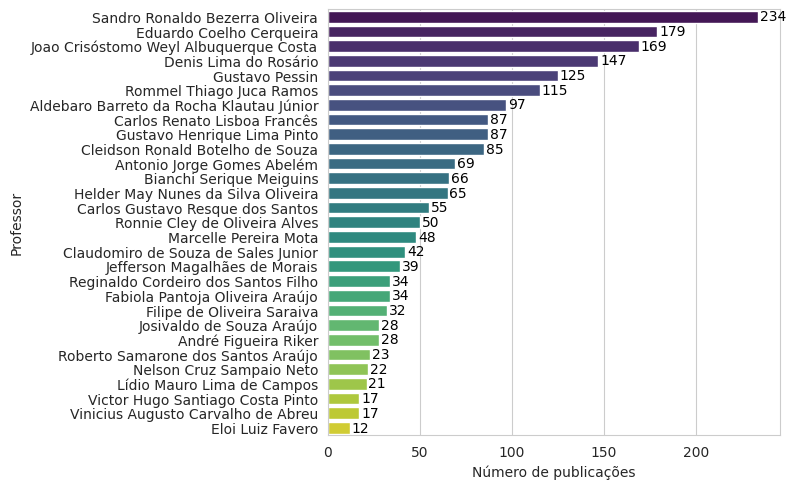

In [32]:
fig_pub_prof, ax_pub_prof = plt.subplots(figsize=(8, 5))
sns.barplot(data=df_pub_by_prof, x="total", y="name", ax=ax_pub_prof, palette="viridis")

for index, value in enumerate(df_pub_by_prof["total"]):
    ax_pub_prof.text(value + 1, index, str(value), color='black', va='center')

ax_pub_prof.set_xlabel("Número de publicações")
ax_pub_prof.set_ylabel("Professor")

plt.tight_layout()

plt.savefig(Path(visualization_directory, "publications_per_professor.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "publications_per_professor.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "publications_per_professor.pdf"), format='pdf', bbox_inches='tight')

plt.show()

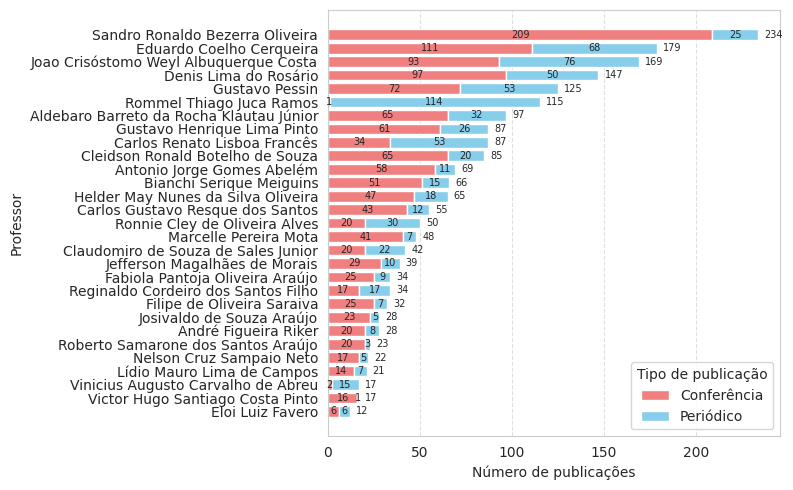

In [38]:
df_pub_by_prof = df_pub_by_prof.sort_values("total", ascending=True)

y = range(len(df_pub_by_prof))
conf = df_pub_by_prof["CONFERENCIA"].to_numpy()
peri = df_pub_by_prof["PERIODICO"].to_numpy()
labels = df_pub_by_prof["name"].tolist()
totals = (conf + peri)

fig_pub_prof, ax_pub_prof = plt.subplots(figsize=(8, 5))

bars_conf = ax_pub_prof.barh(y, conf, color="lightcoral", label="Conferência")
bars_peri = ax_pub_prof.barh(y, peri, left=conf, color="skyblue", label="Periódico")


ax_pub_prof.set_yticks(y)
ax_pub_prof.set_yticklabels(labels)


ax_pub_prof.set_xlabel("Número de publicações")
ax_pub_prof.set_ylabel("Professor")
ax_pub_prof.legend(title="Tipo de publicação")


ax_pub_prof.xaxis.grid(linestyle='--', which='major', color='grey', alpha=.25)
ax_pub_prof.yaxis.grid(False)


for i, (c, p, t) in enumerate(zip(conf, peri, totals)):
    if c > 0:
        ax_pub_prof.text(c / 2, i, f"{int(c)}", fontsize=7, ha='center', va='center')
    if p > 0:
        ax_pub_prof.text(c + p / 2, i, f"{int(p)}", fontsize=7, ha='center', va='center')
    ax_pub_prof.text(t + max(totals) * 0.01 + 1, i, f"{int(t)}", fontsize=7, ha='left', va='center')

plt.tight_layout()

plt.savefig(Path(visualization_directory, "publications_per_professor.png"), dpi=300, bbox_inches='tight')
plt.savefig(Path(visualization_directory, "publications_per_professor.svg"), format='svg', bbox_inches='tight')
plt.savefig(Path(visualization_directory, "publications_per_professor.pdf"), format='pdf', bbox_inches='tight')

plt.show()

## 3.6. Clusters of researchers

In [67]:
ids_ufpa = {}

for name in sorted(df_ufpa["name"].unique()):
    initials = ''.join([part[0] for part in name.split() if part[0].isupper()])
    ids_ufpa[name] = initials

ids_ufpa

{'Aldebaro Barreto da Rocha Klautau Júnior': 'ABRKJ',
 'André Figueira Riker': 'AFR',
 'Antonio Jorge Gomes Abelém': 'AJGA',
 'Bianchi Serique Meiguins': 'BSM',
 'Carlos Gustavo Resque dos Santos': 'CGRS',
 'Carlos Renato Lisboa Francês': 'CRLF',
 'Claudomiro de Souza de Sales Junior': 'CSSJ',
 'Cleidson Ronald Botelho de Souza': 'CRBS',
 'Denis Lima do Rosário': 'DLR',
 'Eduardo Coelho Cerqueira': 'ECC',
 'Eloi Luiz Favero': 'ELF',
 'Fabiola Pantoja Oliveira Araújo': 'FPOA',
 'Filipe de Oliveira Saraiva': 'FOS',
 'Gustavo Henrique Lima Pinto': 'GHLP',
 'Gustavo Pessin': 'GP',
 'Helder May Nunes da Silva Oliveira': 'HMNSO',
 'Jefferson Magalhães de Morais': 'JMM',
 'Joao Crisóstomo Weyl Albuquerque Costa': 'JCWAC',
 'Josivaldo de Souza Araújo': 'JSA',
 'Lídio Mauro Lima de Campos': 'LMLC',
 'Marcelle Pereira Mota': 'MPM',
 'Nelson Cruz Sampaio Neto': 'NCSN',
 'Reginaldo Cordeiro dos Santos Filho': 'RCSF',
 'Roberto Samarone dos Santos Araújo': 'RSSA',
 'Rommel Thiago Juca Ramos': 'RTJR

In [69]:
df_clusters_prof = df_ufpa[["name", "authors"]]
df_clusters_prof = df_clusters_prof.explode("authors")
df_clusters_prof = df_clusters_prof[df_clusters_prof["name"] != df_clusters_prof["authors"]]
df_clusters_prof = df_clusters_prof[df_clusters_prof["authors"].isin(set(ids_ufpa.keys()))]
df_clusters_prof = df_clusters_prof.map(lambda x: ids_ufpa[x] if x in ids_ufpa else x)
df_clusters_prof = df_clusters_prof.groupby(by=["name", "authors"]).size().reset_index(name="n_coauthorships")
df_clusters_prof.columns = ["source", "target", "n_coauthorships"]
df_clusters_prof

,source,target,n_coauthorships
0,ABRKJ,FPOA,4
1,ABRKJ,JCWAC,1
2,AFR,AJGA,6
3,AFR,DLR,3
4,AFR,ECC,7
...,...,...,...
109,SRBO,ELF,1
110,SRBO,JSA,2
111,VACA,MPM,1
112,VACA,RTJR,2


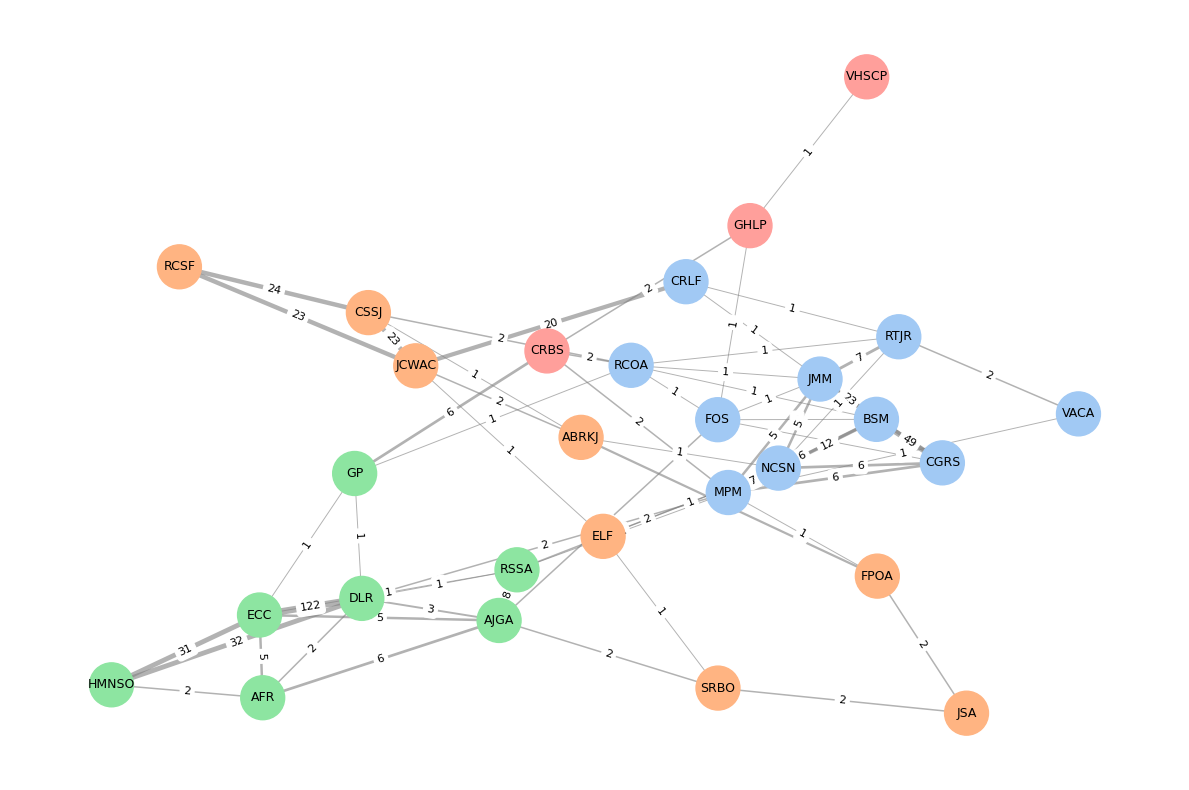

In [89]:
G = nx.from_pandas_edgelist(
    df_clusters_prof,
    source="source",
    target="target",
    edge_attr="n_coauthorships"
)

pos = nx.spring_layout(G, seed=42, k=0.3)

weights = [d["n_coauthorships"] for _, _, d in G.edges(data=True)]
edge_widths = [np.log1p(w) for w in weights]

communities = list(greedy_modularity_communities(G))

communities = sorted(communities, key=lambda c: (-len(c), sorted(c)[0]))

node_to_comm = {}
for idx, comm in enumerate(communities):
    for n in comm:
        node_to_comm[n] = idx

n_comms = len(communities)
palette = sns.color_palette("pastel", n_comms)
node_colors = [palette[node_to_comm[n]] for n in G.nodes]

plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(
    G, pos,
    node_size=1000,
    node_color=node_colors
)

nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    edge_color="gray",
    alpha=0.6
)

nx.draw_networkx_labels(
    G, pos,
    font_size=9,
)

edge_labels = nx.get_edge_attributes(G, "n_coauthorships")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.axis("off")
plt.tight_layout()
plt.show()